Axes(0.125,0.11;0.775x0.77)
Found 991 small companies:


KeyError: "['valor_de_mercado', 'liquidez_diária'] not in index"

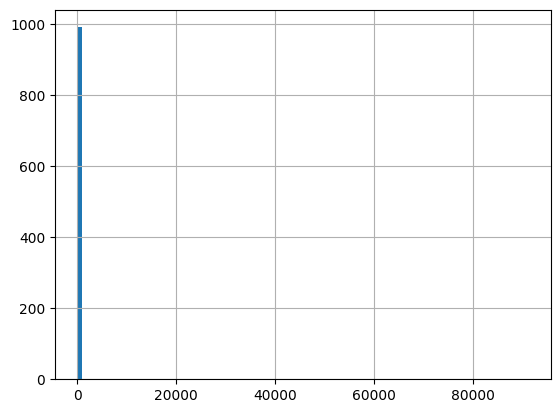

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# 1. Scrape Fundamentus main table
def fetch_fundamentus_table() -> pd.DataFrame:
    url = "https://www.fundamentus.com.br/resultado.php"
    
    # Headers needed to avoid 403 Forbidden
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    response.encoding = "latin-1"
    
    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find("table")

    # Parse the HTML table into DataFrame
    df = pd.read_html(str(table), decimal=",", thousands=".")[0]
    
    return df

# 2. Clean column names (remove spaces, lowercase)
def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
    return df

# 3. Filter by desired rules (small caps)
def filter_small_caps(df: pd.DataFrame, market_cap_limit=1_000_000_000) -> pd.DataFrame:
    # Remove NaNs
    df = df.dropna(subset=["p/ativo"])

    # Convert 'valor_de_mercado' to numeric (already parsed by pandas)
    filtered_df = df[df["p/ativo"] <= market_cap_limit]
    
    return filtered_df

# 4. Fetch and process
def get_small_companies():
    df = fetch_fundamentus_table()
    df = clean_columns(df)
    small_caps_df = filter_small_caps(df)
    return small_caps_df

# 5. Run
small_caps = get_small_companies()

print(f"Found {len(small_caps)} small companies:")
display(small_caps[["papel", "cotação", "valor_de_mercado", "liquidez_diária"]])

In [ ]:
# 6. Save tickers for later
small_caps["papel"].to_csv("small_companies_list.csv", index=False)
print("\n✅ Tickers saved to 'small_companies_list.csv'.")